In [ ]:
import pandas as pd

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

In [ ]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [ ]:
data.shape

(250000, 13)

In [ ]:
data.info()
data.isnull().sum()  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB
None


<ipython-input-7-f2f5e5400002>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


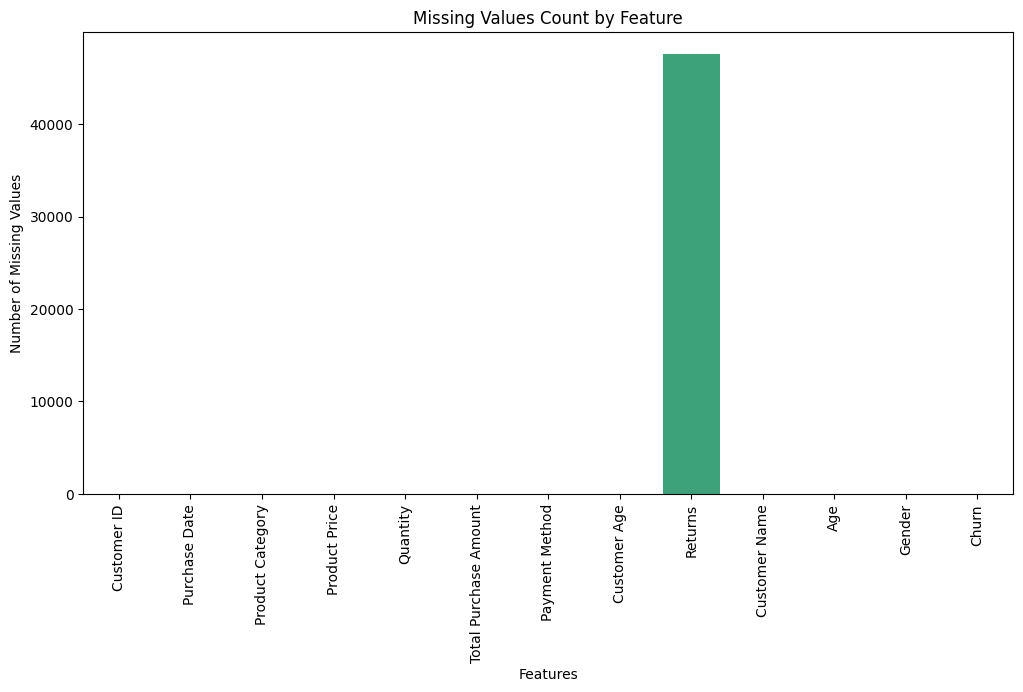

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your dataset
# Display basic information about the dataset
print(data.info())

# Check for missing values in each column
missing_values = data.isnull().sum()

# Plot the missing values (including zero missing values) on a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Missing Values Count by Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()


In [ ]:
data['Returns'].fillna(0, inplace=True)

In [ ]:
data.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


In [ ]:
data = data.drop(['Customer Name','Age'], axis=1)

In [ ]:
data['Total Purchase Amount'] = data['Product Price'] * data['Quantity']

In [ ]:
data = data.drop(['Product Price','Quantity'], axis=1)

In [ ]:
data.columns

Index(['Customer ID', 'Purchase Date', 'Product Category',
       'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
       'Gender', 'Churn'],
      dtype='object')

In [ ]:
# Assuming your dataframe is named 'df' and 'Purchase Date' is the column with date and time
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])  # Ensure column is in datetime format

# Remove the time part and keep only the date
data['Purchase Date'] = data['Purchase Date'].dt.date

In [ ]:
data.head()

,Customer ID,Purchase Date,Product Category,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,46251,2020-09-08,Electronics,36,Credit Card,37,0.0,Male,0
1,46251,2022-03-05,Home,1872,PayPal,37,0.0,Male,0
2,46251,2022-05-23,Home,576,PayPal,37,0.0,Male,0
3,46251,2020-11-12,Clothing,196,PayPal,37,0.0,Male,0
4,13593,2020-11-27,Home,449,Credit Card,49,0.0,Female,1


In [ ]:
print(data.dtypes)

Customer ID                int64
Purchase Date             object
Product Category          object
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Gender                    object
Churn                      int64
dtype: object


In [ ]:
import pandas as pd

# Assuming the dataframe is named 'df'
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])  # Ensure 'Purchase Date' is in datetime format

# Sort by 'Customer ID' and 'Purchase Date'
data = data.sort_values(by=['Customer ID', 'Purchase Date'])

# Add the 'Number of Transactions' column
data['Number of Transactions'] = data.groupby('Customer ID').cumcount()

# Display the updated dataframe
data.head(20)


,Customer ID,Purchase Date,Product Category,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn,Number of Transactions
151166,1,2023-07-19,Books,845,PayPal,70,1.0,Male,0,0
244416,2,2021-03-05,Books,144,PayPal,27,1.0,Female,0,0
244417,2,2021-09-19,Books,392,PayPal,27,0.0,Female,0,1
244418,2,2022-11-21,Electronics,534,PayPal,27,0.0,Female,0,2
231817,3,2020-09-27,Electronics,804,Credit Card,23,0.0,Female,0,0
231820,3,2020-11-09,Clothing,1116,Cash,23,1.0,Female,0,1
231813,3,2021-05-22,Books,660,Credit Card,23,1.0,Female,0,2
231816,3,2021-11-17,Books,450,PayPal,23,0.0,Female,0,3
231814,3,2021-11-18,Clothing,900,Credit Card,23,1.0,Female,0,4
231818,3,2022-01-17,Home,170,PayPal,23,0.0,Female,0,5


In [ ]:
# Create the 'Number of Returns' column
data['Number of Returns'] = data.groupby('Customer ID')['Returns'].cumsum()

# Forward fill the 'Number of Returns' where Returns is not equal to 1
data['Number of Returns'] = data['Number of Returns'].where(data['Returns'] == 1).ffill().fillna(0).astype(int)


In [ ]:
# Add the 'Total Spendings' column which is the cumulative sum of 'Total Purchase Amount'
data['Total Spendings'] = data.groupby('Customer ID')['Total Purchase Amount'].cumsum()


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# Ensure 'Purchase Date' is in datetime format
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Calculate Recency, Frequency, and Monetary values
current_date = data['Purchase Date'].max()  # Get the most recent purchase date

# Group by 'Customer ID' to calculate RFM
rfm = data.groupby('Customer ID').agg({
    'Purchase Date': lambda x: (current_date - x.max()).days,  # Recency
    'Customer ID': 'count',  # Frequency
    'Total Purchase Amount': 'sum'  # Monetary
}).rename(columns={
    'Purchase Date': 'Recency',
    'Customer ID': 'Frequency',
    'Total Purchase Amount': 'Monetary'
}).reset_index()

# Merge the RFM DataFrame with the original DataFrame
data = data.merge(rfm, on='Customer ID', how='left')

# Adding additional features
data['Average Purchase Value'] = data['Total Purchase Amount'] / data['Number of Transactions'].replace(0, 1)  # Avoid division by zero
data['Churn Risk Score'] = (data['Recency'] * -1 + data['Frequency'] + data['Monetary']) / 3

# 1. Recency/First Purchase Month
data['First Purchase Month'] = data.groupby('Customer ID')['Purchase Date'].transform('min').dt.to_period('M')
data['Current Purchase Month'] = data['Purchase Date'].dt.to_period('M')

# 2. Customer Engagement Levels
def engagement_level(row):
    if row['Recency'] <= 30 and row['Frequency'] > 5 and row['Monetary'] > 500:
        return 2
    elif row['Recency'] <= 90 and row['Frequency'] > 2:
        return 1
    else:
        return 0

data['Customer Engagement Level'] = data.apply(engagement_level, axis=1)

# 3. Seasonal or Campaign Features
data['Is Holiday Season'] = data['Purchase Date'].apply(lambda x: 1 if x.month in [11, 12] else 0)  # Assuming holiday season is November and December
data['Is Promotional Month'] = data['Purchase Date'].apply(lambda x: 1 if x.month in [4, 5] else 0)  # Assuming promotional months are April and May

# Segment customers based on RFM
def segment_customers(row):
    if row['Recency'] <= 30 and row['Frequency'] > 5 and row['Monetary'] > 500:
        return 2
    elif row['Recency'] <= 90 and row['Frequency'] > 2:
        return 1
    else:
        return 0

data['Customer Segment'] = data.apply(segment_customers, axis=1)

# Display the updated DataFrame with new columns
data.head()


,Customer ID,Purchase Date,Product Category,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn,Number of Transactions,...,Frequency,Monetary,Average Purchase Value,Churn Risk Score,First Purchase Month,Current Purchase Month,Customer Engagement Level,Is Holiday Season,Is Promotional Month,Customer Segment
0,1,2023-07-19,Books,845,PayPal,70,1.0,Male,0,0,...,1,845,845.0,262.666667,2023-07,2023-07,0,0,0,0
1,2,2021-03-05,Books,144,PayPal,27,1.0,Female,0,0,...,3,1070,144.0,258.333333,2021-03,2021-03,0,0,0,0
2,2,2021-09-19,Books,392,PayPal,27,0.0,Female,0,1,...,3,1070,392.0,258.333333,2021-03,2021-09,0,0,0,0
3,2,2022-11-21,Electronics,534,PayPal,27,0.0,Female,0,2,...,3,1070,267.0,258.333333,2021-03,2022-11,0,1,0,0
4,3,2020-09-27,Electronics,804,Credit Card,23,0.0,Female,0,0,...,8,5041,804.0,1653.333333,2020-09,2020-09,1,0,0,1


In [ ]:
# Columns to drop due to redundancy or irrelevance
columns_to_drop = [
    'Total Purchase Amount',  # Already captured by 'Monetary'
    'Number of Transactions',  # Already captured by 'Frequency'
    'Returns',  # Already captured by 'Number of Returns'
    'Total Spendings',  # Already captured by 'Monetary'
    'Payment Method',  # Irrelevant unless needed for analysis
    'Gender',  # Irrelevant unless needed for analysis
    'Current Purchase Month',
    'Customer Segment'# Optional, based on cohort analysis needs
]

# Drop the columns
data = data.drop(columns=columns_to_drop)

# Display the updated DataFrame
data.head()


,Customer ID,Purchase Date,Product Category,Customer Age,Churn,Number of Returns,Recency,Frequency,Monetary,Average Purchase Value,Churn Risk Score,First Purchase Month,Customer Engagement Level,Is Holiday Season,Is Promotional Month
0,1,2023-07-19,Books,70,0,1,58,1,845,845.0,262.666667,2023-07,0,0,0
1,2,2021-03-05,Books,27,0,1,298,3,1070,144.0,258.333333,2021-03,0,0,0
2,2,2021-09-19,Books,27,0,1,298,3,1070,392.0,258.333333,2021-03,0,0,0
3,2,2022-11-21,Electronics,27,0,1,298,3,1070,267.0,258.333333,2021-03,0,1,0
4,3,2020-09-27,Electronics,23,0,1,89,8,5041,804.0,1653.333333,2020-09,1,0,0


In [ ]:
data.groupby('Customer ID').size().value_counts()

,count
5,8855
4,8670
6,7265
3,7000
7,5242
2,4277
8,3268
9,1822
1,1685
10,912


In [ ]:
#Convert 'Purchase Date' to datetime, coercing invalid dates to NaT (Not a Time)
#data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], errors='coerce')

# Check for any rows where 'Purchase Date' is NaT (invalid dates)
#invalid_dates = data[data['Purchase Date'].isna()]
#print(invalid_dates)

#Optionally: Drop rows with NaT values in 'Purchase Date' if necessary
#data.dropna(subset=['Purchase Date'], inplace=True)

# Extracting useful features
#data['Purchase Year'] = data['Purchase Date'].dt.year
#data['Purchase Month'] = data['Purchase Date'].dt.month
#data['Purchase Day'] = data['Purchase Date'].dt.day



In [ ]:
#data = data.drop('Purchase Date', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Product Category']

# Dictionary to store the label mappings
label_mappings = {}

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    # Store the mapping of original values to encoded values
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the label mappings
for col, mapping in label_mappings.items():
    print(f"Label mapping for {col}: {mapping}")

# Display the first few rows to verify the encoding
data.head()


Label mapping for Product Category: {'Books': 0, 'Clothing': 1, 'Electronics': 2, 'Home': 3}


,Customer ID,Purchase Date,Product Category,Customer Age,Churn,Number of Returns,Recency,Frequency,Monetary,Average Purchase Value,Churn Risk Score,First Purchase Month,Customer Engagement Level,Is Holiday Season,Is Promotional Month
0,1,2023-07-19,0,70,0,1,58,1,845,845.0,262.666667,2023-07,0,0,0
1,2,2021-03-05,0,27,0,1,298,3,1070,144.0,258.333333,2021-03,0,0,0
2,2,2021-09-19,0,27,0,1,298,3,1070,392.0,258.333333,2021-03,0,0,0
3,2,2022-11-21,2,27,0,1,298,3,1070,267.0,258.333333,2021-03,0,1,0
4,3,2020-09-27,2,23,0,1,89,8,5041,804.0,1653.333333,2020-09,1,0,0


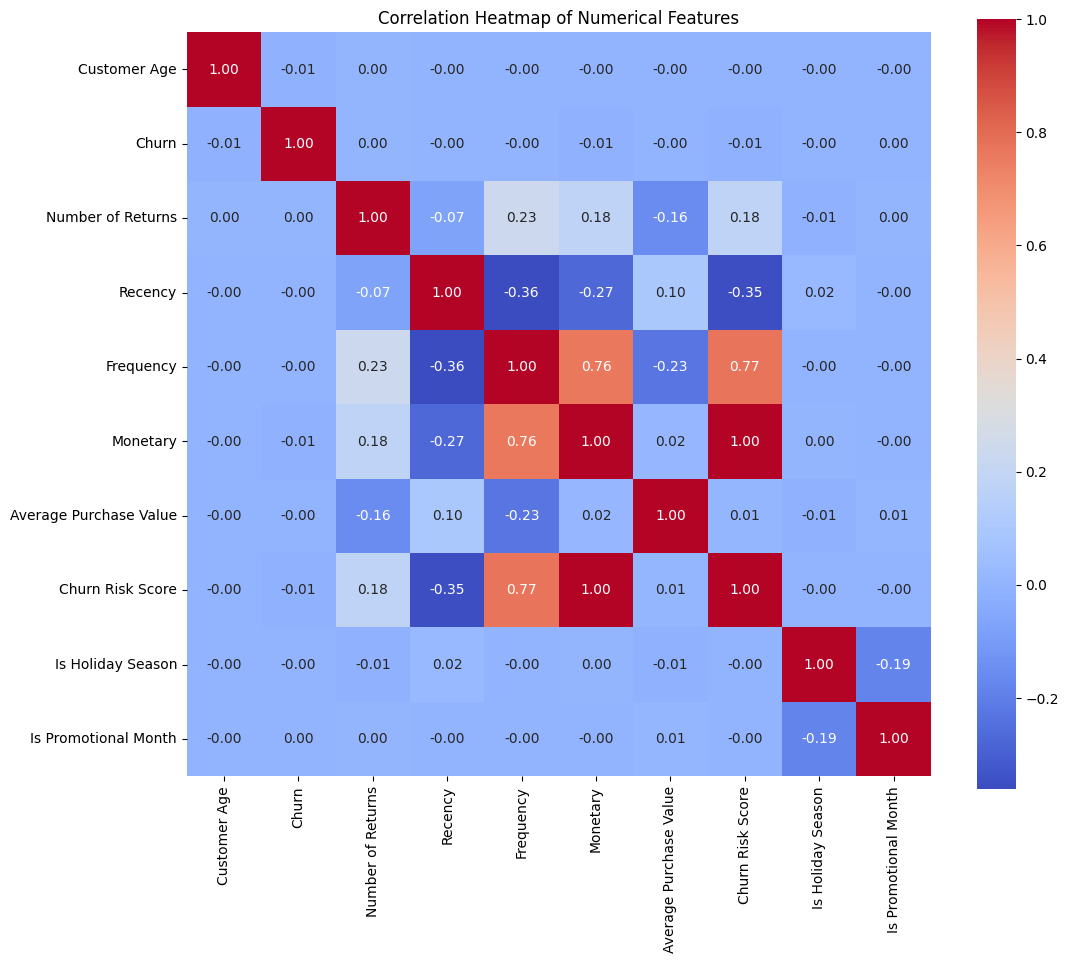

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# Select only the relevant numerical columns for correlation
numerical_columns = [
    'Customer Age',
    'Churn',
    'Number of Returns',
    'Recency',
    'Frequency',
    'Monetary',
    'Average Purchase Value',
    'Churn Risk Score',
    'Is Holiday Season',  # New binary feature
    'Is Promotional Month' # New binary feature
]

# Select only the numerical columns
numerical_data = data[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Customer Age'].quantile(0.25)
Q3 = data['Customer Age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Customer Age'] < lower_bound) | (data['Customer Age'] > upper_bound)]

# Print outliers
print("Outliers in Customer Age column:")
print(outliers)


Outliers in Customer Age column:
Empty DataFrame
Columns: [Customer ID, Purchase Date, Product Category, Customer Age, Churn, Number of Returns, Recency, Frequency, Monetary, Average Purchase Value, Churn Risk Score, First Purchase Month, Customer Engagement Level, Is Holiday Season, Is Promotional Month]
Index: []


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


data['Is Holiday Season'] = data['Purchase Date'].dt.month.isin([11, 12]).astype(int)  # Example: Nov and Dec
data['Is Promotional Month'] = data['Purchase Date'].dt.month.isin([6, 7]).astype(int)  # Example: June and July

# Add Average Return Rate (total returns / total transactions per customer)
data['Average Return Rate'] = data['Number of Returns'] / data['Frequency'].replace(0, 1)  # Avoid division by zero

# Select features for prediction including the new features
features = [
    'Recency',
    'Frequency',
    'Monetary',
    'Average Purchase Value',
    'Churn Risk Score',
    'Customer Engagement Level',
    'Is Holiday Season',
    'Is Promotional Month',
    'Average Return Rate'
]
X = data[features]
y = data['Churn']

# Check for NaN and infinite values before splitting
print("Checking for NaN values in features:")
print(X.isna().sum())

print("Checking for infinite values in features:")
print(np.isinf(X).sum())

# Replace or drop NaN values if found
X = X.fillna(0)  # Or choose a strategy like mean, median, etc.
y = y.fillna(0)  # Ensure y also does not have NaNs

# Optionally replace infinite values
X = np.where(np.isinf(X), 0, X)  # Replace infinite values with 0 or other appropriate value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Recheck for NaN or infinite values after splitting
print("Checking for NaN values in X_train:")
print(pd.isna(X_train).sum())

print("Checking for infinite values in X_train:")
print(np.isinf(X_train).sum())

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Checking for NaN values in features:
Recency                      0
Frequency                    0
Monetary                     0
Average Purchase Value       0
Churn Risk Score             0
Customer Engagement Level    0
Is Holiday Season            0
Is Promotional Month         0
Average Return Rate          0
dtype: int64
Checking for infinite values in features:
Recency                      0
Frequency                    0
Monetary                     0
Average Purchase Value       0
Churn Risk Score             0
Customer Engagement Level    0
Is Holiday Season            0
Is Promotional Month         0
Average Return Rate          0
dtype: int64
Checking for NaN values in X_train:
0
Checking for infinite values in X_train:
0


In [ ]:
X_train

array([[ 5.06433805e-01, -8.94387365e-01, -1.06542511e+00, ...,
        -3.96041508e-01, -4.68457799e-01,  1.22268092e+00],
       [ 2.16954060e+00, -2.23633266e+00, -1.61764162e+00, ...,
         2.52498786e+00, -4.68457799e-01,  2.05313207e+00],
       [-3.78611334e-01,  4.47557925e-01,  6.81839966e-01, ...,
        -3.96041508e-01,  2.13466400e+00, -3.19585492e-01],
       ...,
       [-7.09287540e-01, -4.47072269e-01, -6.85916445e-01, ...,
        -3.96041508e-01, -4.68457799e-01, -6.04311600e-01],
       [-4.95320583e-01,  2.42828195e-04, -6.94439689e-01, ...,
         2.52498786e+00, -4.68457799e-01, -7.15038420e-01],
       [-7.72505050e-01,  2.42828195e-04, -3.16725390e-01, ...,
        -3.96041508e-01,  2.13466400e+00, -1.61404321e-01]])

In [ ]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
249995,0
249996,0
249997,0
249998,0


In [ ]:
# Summary statistics
data.describe()


,Customer ID,Purchase Date,Product Category,Customer Age,Churn,Number of Returns,Recency,Frequency,Monetary,Average Purchase Value,Churn Risk Score,Customer Engagement Level,Is Holiday Season,Is Promotional Month,Average Return Rate
count,250000.00000,250000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25004.03624,2021-11-06 11:32:12.825600,1.299900,43.940528,0.199496,2.015060,216.408356,6.000192,4580.459156,446.396244,1456.683664,0.415676,0.135244,0.180280,0.381578
min,1.00000,2020-01-01 00:00:00,0.000000,18.000000,0.000000,1.000000,0.000000,1.000000,12.000000,1.230769,-437.333333,0.000000,0.000000,0.000000,0.058824
25%,12497.75000,2020-12-02 00:00:00,0.000000,31.000000,0.000000,1.000000,65.000000,4.000000,2940.000000,112.500000,900.666667,0.000000,0.000000,0.000000,0.200000
50%,25018.00000,2021-11-06 00:00:00,1.000000,44.000000,0.000000,2.000000,154.000000,6.000000,4341.000000,271.666667,1383.333333,0.000000,0.000000,0.000000,0.333333
75%,37506.00000,2022-10-11 00:00:00,2.000000,57.000000,0.000000,3.000000,305.000000,7.000000,5955.000000,593.333333,1931.666667,1.000000,0.000000,0.000000,0.500000
max,50000.00000,2023-09-15 00:00:00,3.000000,70.000000,1.000000,10.000000,1353.000000,17.000000,16860.000000,2500.000000,5608.000000,2.000000,1.000000,1.000000,9.000000
std,14428.27959,NaN,1.099122,15.350246,0.399622,1.164017,205.401909,2.233631,2227.903066,482.119188,764.743817,0.648471,0.341985,0.384421,0.300697


In [ ]:
data.head()

,Customer ID,Purchase Date,Product Category,Customer Age,Churn,Number of Returns,Recency,Frequency,Monetary,Average Purchase Value,Churn Risk Score,First Purchase Month,Customer Engagement Level,Is Holiday Season,Is Promotional Month,Average Return Rate
0,1,2023-07-19,0,70,0,1,58,1,845,845.0,262.666667,2023-07,0,0,1,1.000000
1,2,2021-03-05,0,27,0,1,298,3,1070,144.0,258.333333,2021-03,0,0,0,0.333333
2,2,2021-09-19,0,27,0,1,298,3,1070,392.0,258.333333,2021-03,0,0,0,0.333333
3,2,2022-11-21,2,27,0,1,298,3,1070,267.0,258.333333,2021-03,0,1,0,0.333333
4,3,2020-09-27,2,23,0,1,89,8,5041,804.0,1653.333333,2020-09,1,0,0,0.125000


In [ ]:
# Checking the distribution of the target variable 'Churn'
data['Churn'].value_counts()


,count
Churn,
0,200126
1,49874


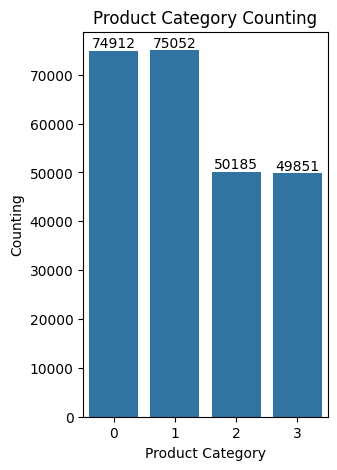

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
fig.add_subplot(131)
ax = sns.countplot(data=data, x='Product Category')
ax.set(title='Product Category Counting', ylabel='Counting')
for label in ax.containers:
    ax.bar_label(label)


plt.subplots_adjust(hspace=.5, wspace=.4)
plt.show()

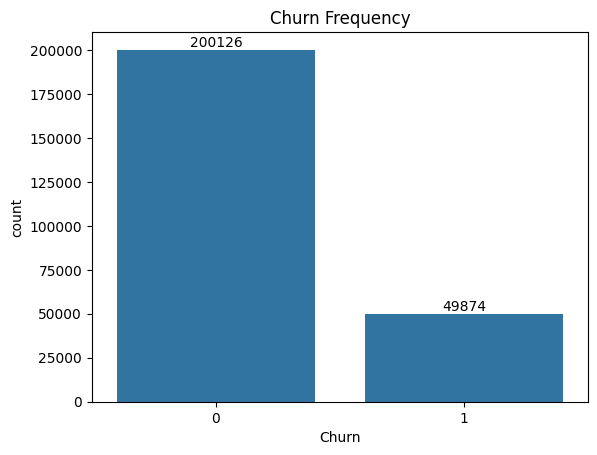

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.countplot(data=data, x='Churn')
for label in ax.containers:
    ax.bar_label(label)
ax.set(title='Churn Frequency')
plt.show()


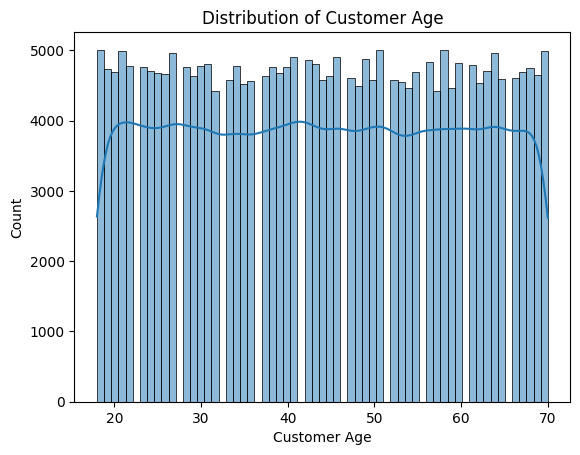

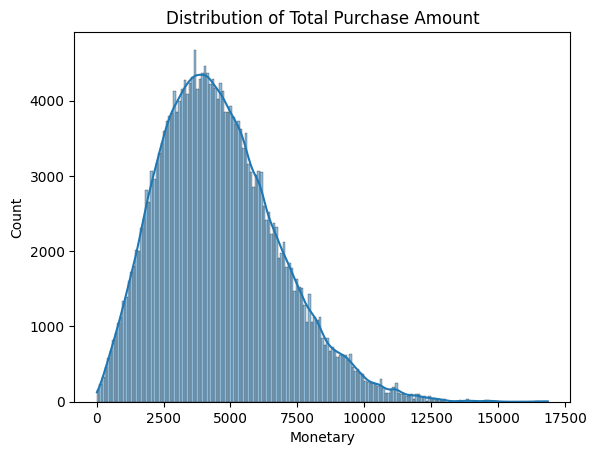

In [ ]:
# Distribution of 'Customer Age'
sns.histplot(data['Customer Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.show()

# Distribution of 'Total Purchase Amount'
sns.histplot(data['Monetary'], kde=True)
plt.title('Distribution of Total Purchase Amount')
plt.show()


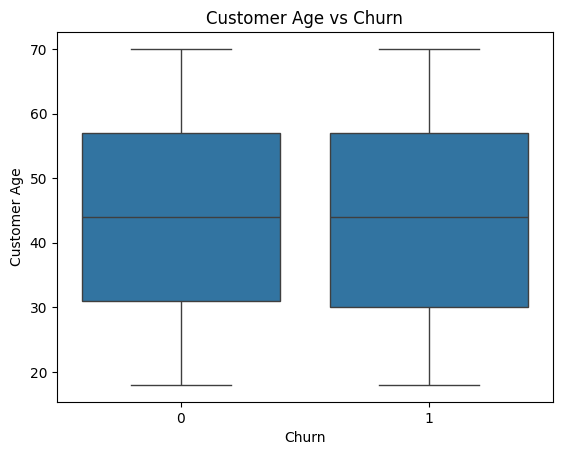

In [ ]:
# Box plot of 'Customer Age' by 'Churn'
sns.boxplot(x='Churn', y='Customer Age', data=data)
plt.title('Customer Age vs Churn')
plt.show()




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Customer ID                250000 non-null  int64         
 1   Purchase Date              250000 non-null  datetime64[ns]
 2   Product Category           250000 non-null  int64         
 3   Customer Age               250000 non-null  int64         
 4   Churn                      250000 non-null  int64         
 5   Number of Returns          250000 non-null  int64         
 6   Recency                    250000 non-null  int64         
 7   Frequency                  250000 non-null  int64         
 8   Monetary                   250000 non-null  int64         
 9   Average Purchase Value     250000 non-null  float64       
 10  Churn Risk Score           250000 non-null  float64       
 11  First Purchase Month       250000 non-null  period[M

In [ ]:
# Install imbalanced-learn if not already installed
#!pip install imbalanced-learn

# Import necessary libraries
#from imblearn.over_sampling import RandomOverSampler

# Checking the current class distribution
#print("Before oversampling:")
#print(data['Churn'].value_counts())

# Apply Random Oversampling to the training data
#ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_train, y_train = ros.fit_resample(X, y)

# Convert the resampled data back to a DataFrame for further analysis
#X_train = pd.DataFrame(X_train, columns=X.columns)
#y_train = pd.Series(y_train, name='Churn')

# Check the class distribution after oversampling
#print("After oversampling:")
#print(y_train.value_counts())

# Combine the resampled data back into a single DataFrame if needed
#data = pd.concat([X_train, y_train], axis=1)


In [ ]:
# Install imbalanced-learn if not already installed
#!pip install imbalanced-learn

# Import necessary libraries
#from imblearn.over_sampling import SMOTE, SMOTENC
#categorical_features= [0, 4, 7]
#smote = SMOTENC(categorical_features = categorical_features, random_state=42)
#X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled target variable
#print("Distribution of target variable after SMOTE:")
#print(y_train.value_counts())

<ipython-input-41-d39b65991c40>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')


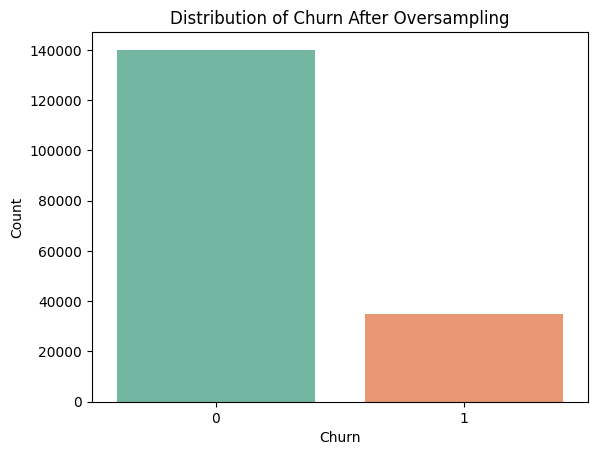

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable after oversampling
sns.countplot(x=y_train, palette='Set2')
plt.title('Distribution of Churn After Oversampling')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.metrics import classification_report

# Define the function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Generate classification report for the test set
    class_report = classification_report(y_test, y_test_pred)

    # Create a dictionary to hold all results
    results = {
        'Test Accuracy': test_accuracy,
        'Classification Report': class_report
    }

    return results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Logistic Regression - Accuracy: 0.8005
Precision: 0.0000
F1 Score: 0.0000
Recall: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60038
           1       0.00      0.00      0.00     14962

    accuracy                           0.80     75000
   macro avg       0.40      0.50      0.44     75000
weighted avg       0.64      0.80      0.71     75000



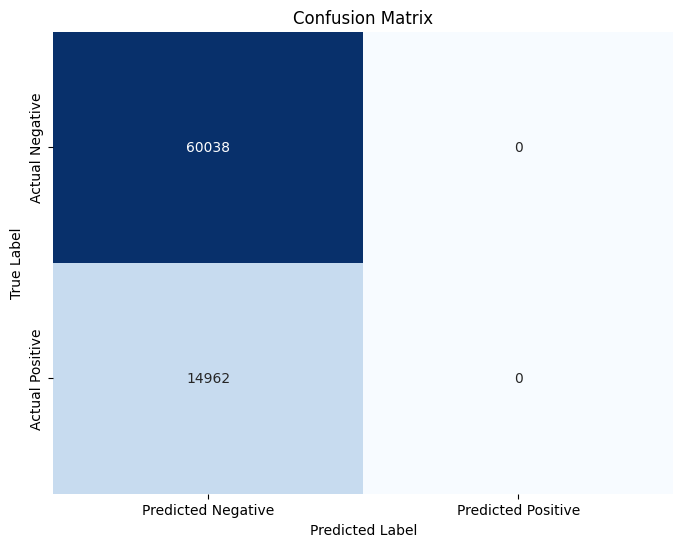

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model and predict
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Store results for Logistic Regression
log_reg_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': classification_report(y_test, y_pred)
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print results
print(f"Logistic Regression - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Random Forest - Accuracy: 0.8652
Precision: 0.9685
F1 Score: 0.4980
Recall: 0.3352
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     60038
           1       0.97      0.34      0.50     14962

    accuracy                           0.87     75000
   macro avg       0.91      0.67      0.71     75000
weighted avg       0.88      0.87      0.84     75000



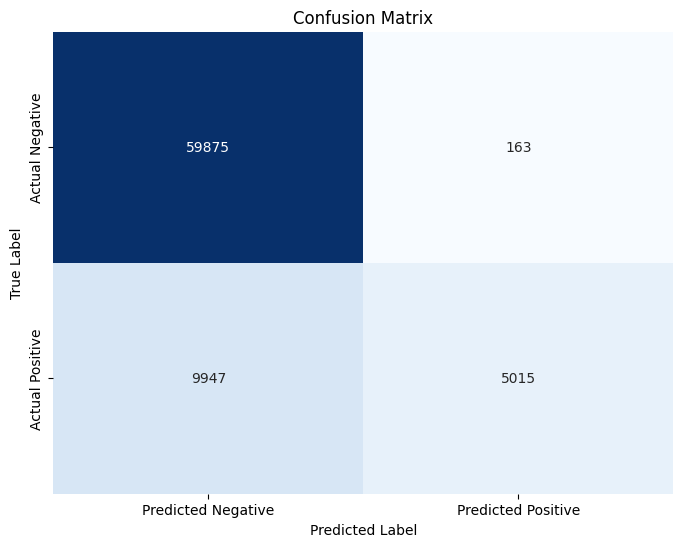

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42,class_weight='balanced')

# Fit the model and make predictions
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Store results in a dictionary
rf_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': classification_report(y_test, y_pred)
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print results
print(f"Random Forest - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Best Parameters Found:  {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Best Decision Tree - Accuracy: 0.9085
Precision: 0.7869
Recall: 0.7424
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     60038
           1       0.79      0.74      0.76     14962

    accuracy                           0.91     75000
   macro avg       0.86      0.85      0.85     75000
weighted avg       0.91      0.91      0.91     75000



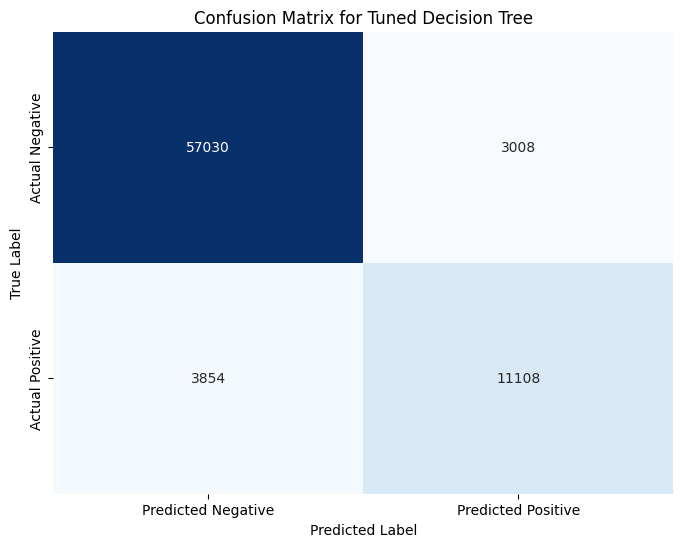

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for tuning
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of iterations to sample
                                   scoring='accuracy',
                                   cv=3,  # 3-fold cross-validation
                                   random_state=42,
                                   n_jobs=-1)  # Use all processors

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Get the best estimator (model with the best found hyperparameters)
best_dt = random_search.best_estimator_

# Make predictions
y_pred_best = best_dt.predict(X_test)

# Calculate accuracy, precision, and recall for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='binary')
recall_best = recall_score(y_test, y_pred_best, average='binary')

# Generate the classification report
class_report_best = classification_report(y_test, y_pred_best)

# Print the best parameters and performance metrics
print("Best Parameters Found: ", best_params)
print(f"Best Decision Tree - Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print("Classification Report:\n", class_report_best)

# Generate the confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.show()


KNN - Accuracy: 0.7710
Precision: 0.2886
F1 Score: 0.1495
Recall: 0.1009
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     60038
           1       0.29      0.10      0.15     14962

    accuracy                           0.77     75000
   macro avg       0.55      0.52      0.51     75000
weighted avg       0.70      0.77      0.72     75000



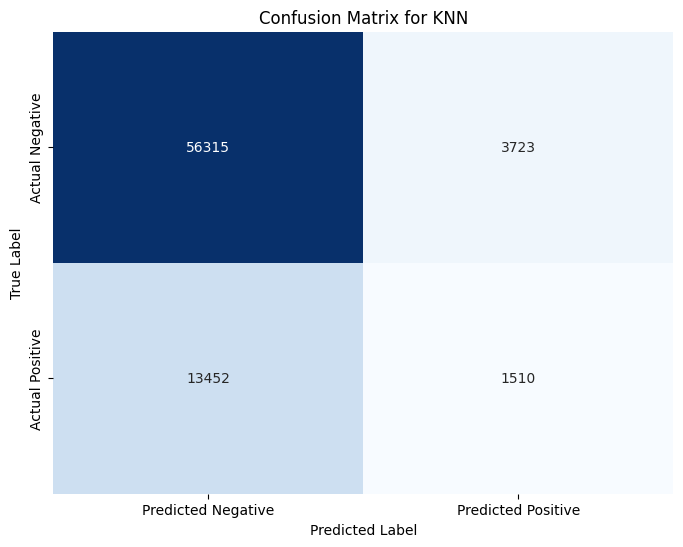

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize K-Nearest Neighbors
knn = KNeighborsClassifier()

# Fit the model and make predictions
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Store results in a dictionary
knn_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': classification_report(y_test, y_pred)
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print results
print(f"KNN - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

Naive Bayes - Accuracy: 0.7995
Precision: 0.2449
F1 Score: 0.0048
Recall: 0.0024
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60038
           1       0.24      0.00      0.00     14962

    accuracy                           0.80     75000
   macro avg       0.52      0.50      0.45     75000
weighted avg       0.69      0.80      0.71     75000



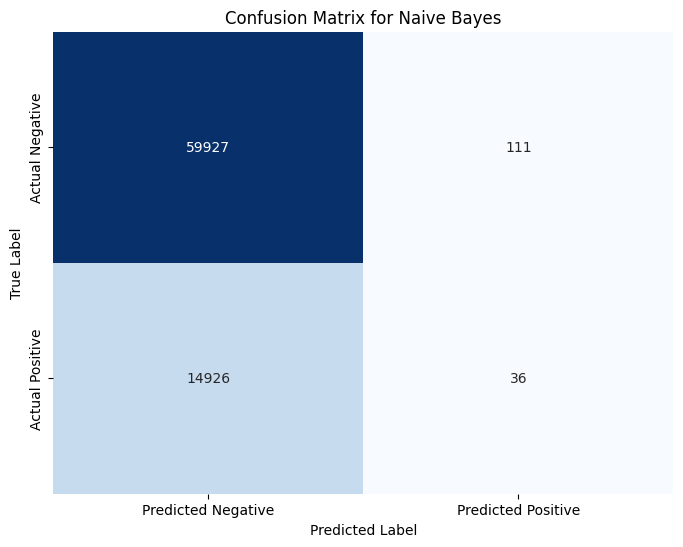

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Naive Bayes
nb = GaussianNB()

# Fit the model and make predictions
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Store results in a dictionary
nb_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': classification_report(y_test, y_pred)
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print results
print(f"Naive Bayes - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [ ]:
!pip install catboost
!pip install lightgbm


CatBoost - Accuracy: 0.8086
Precision: 0.9522
F1 Score: 0.0815
Recall: 0.0426
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     60038
           1       0.95      0.04      0.08     14962

    accuracy                           0.81     75000
   macro avg       0.88      0.52      0.49     75000
weighted avg       0.84      0.81      0.73     75000



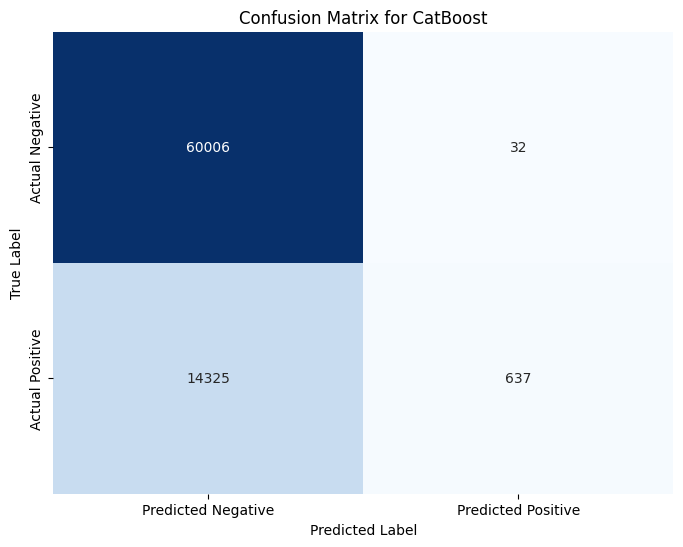

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize CatBoost Classifier with categorical feature indices
catboost = CatBoostClassifier(verbose=0)  # Set verbose=0 to suppress training output

# Fit the model
catboost.fit(X_train, y_train)

# Make predictions
y_pred = catboost.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Store results in a dictionary
catboost_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': classification_report(y_test, y_pred)
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print results
print(f"CatBoost - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost')
plt.show()

In [ ]:
# Save the trained CatBoost model using pickle
import pickle
with open('catboost_model.pkl', 'wb') as file:
    pickle.dump(catboost, file)

print("CatBoost model saved as 'catboost_model.pkl'")

CatBoost model saved as 'catboost_model.pkl'


Decision Tree - Accuracy: 0.9322
Precision: 0.8282
F1 Score: 0.8306
Recall: 0.8330
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     60038
           1       0.83      0.83      0.83     14962

    accuracy                           0.93     75000
   macro avg       0.89      0.89      0.89     75000
weighted avg       0.93      0.93      0.93     75000



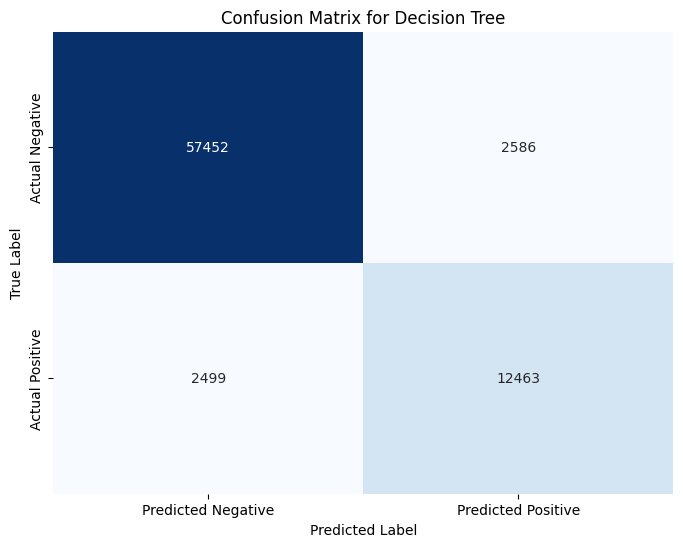

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
dt_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print the results
print(f"Decision Tree - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Best Parameters Found:  {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Best Decision Tree - Accuracy: 0.9085
Precision: 0.7869
Recall: 0.7424
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     60038
           1       0.79      0.74      0.76     14962

    accuracy                           0.91     75000
   macro avg       0.86      0.85      0.85     75000
weighted avg       0.91      0.91      0.91     75000



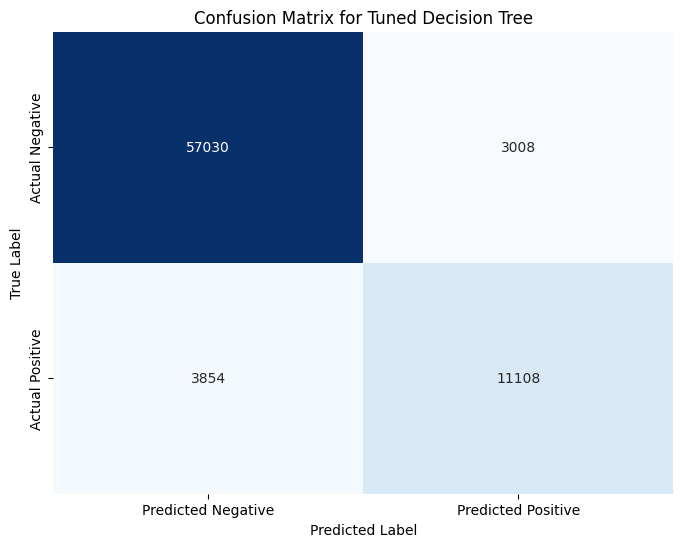

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for tuning
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_dist,
                                   n_iter=10,  # Number of iterations to sample
                                   scoring='accuracy',
                                   cv=3,  # 3-fold cross-validation
                                   random_state=42,
                                   n_jobs=-1)  # Use all processors

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Get the best estimator (model with the best found hyperparameters)
best_dt = random_search.best_estimator_

# Make predictions
y_pred_best = best_dt.predict(X_test)

# Calculate accuracy, precision, and recall for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='binary')
recall_best = recall_score(y_test, y_pred_best, average='binary')

# Generate the classification report
class_report_best = classification_report(y_test, y_pred_best)

# Print the best parameters and performance metrics
print("Best Parameters Found: ", best_params)
print(f"Best Decision Tree - Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print("Classification Report:\n", class_report_best)

# Generate the confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Decision Tree')
plt.show()


In [ ]:
# Save the trained CatBoost model using pickle
import pickle
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

print("Decision Tree model saved as 'dt_model.pkl'")

Decision Tree model saved as 'dt_model.pkl'


Gradient Boosting - Accuracy: 0.8009
Precision: 1.0000
F1 Score: 0.0036
Recall: 0.0018
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60038
           1       1.00      0.00      0.00     14962

    accuracy                           0.80     75000
   macro avg       0.90      0.50      0.45     75000
weighted avg       0.84      0.80      0.71     75000



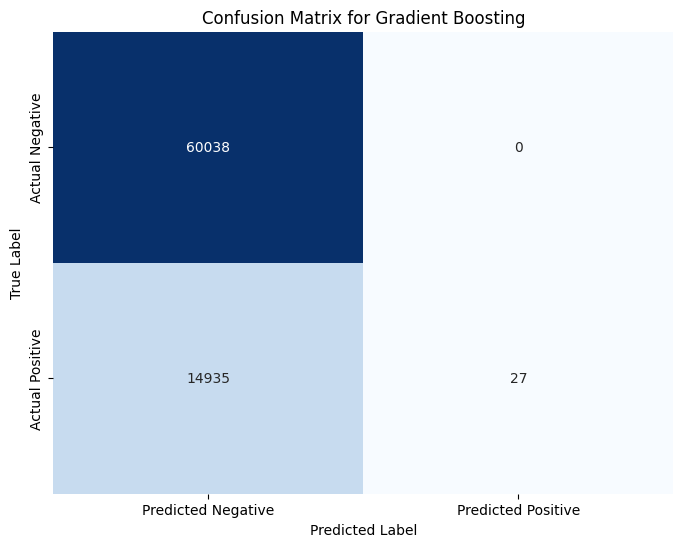

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Make predictions
y_pred = gb.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
gb_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print the results
print(f"Gradient Boosting - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

XGBoost - Accuracy: 0.8087
Precision: 0.9048
F1 Score: 0.0870
Recall: 0.0457
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     60038
           1       0.90      0.05      0.09     14962

    accuracy                           0.81     75000
   macro avg       0.86      0.52      0.49     75000
weighted avg       0.83      0.81      0.73     75000



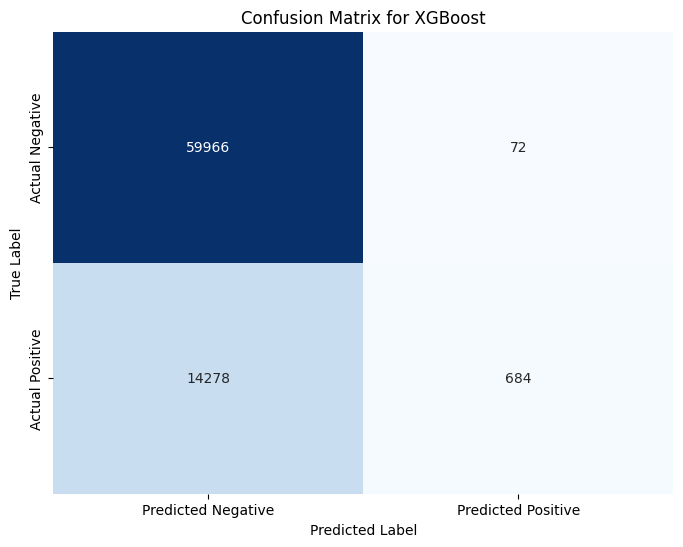

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost Classifier
xgb = XGBClassifier(random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
xgb_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print the results
print(f"XGBoost - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

Bagging Classifier - Accuracy: 0.8087
Precision: 0.9048
F1 Score: 0.0870
Recall: 0.0457
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89     60038
           1       0.90      0.05      0.09     14962

    accuracy                           0.81     75000
   macro avg       0.86      0.52      0.49     75000
weighted avg       0.83      0.81      0.73     75000



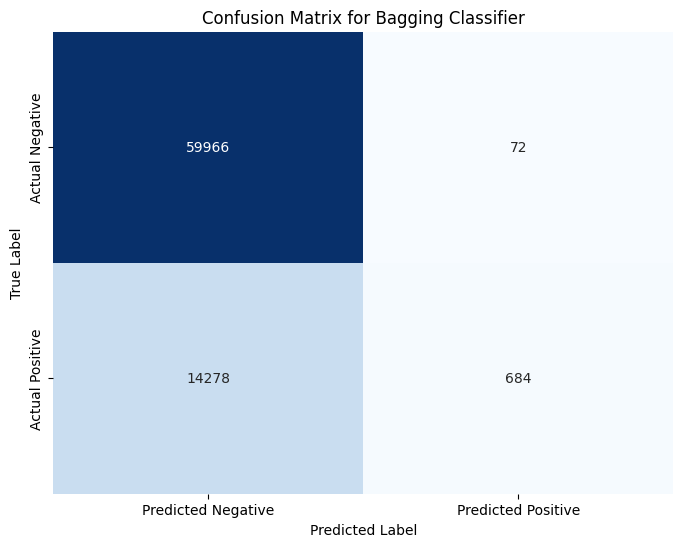

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize Bagging Classifier with Decision Tree as the base model
bagging = BaggingClassifier(estimator=dt, n_estimators=100, random_state=42)

# Fit the Bagging model (assuming X_train and y_train are defined)
bagging.fit(X_train, y_train)


# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
bagging_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print the results
print(f"Bagging Classifier - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()


Best Parameters Found:  {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 0.8}
Bagging Classifier - Accuracy: 0.9513
Precision: 0.9932
F1 Score: 0.8618
Recall: 0.7611
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     60038
           1       0.99      0.76      0.86     14962

    accuracy                           0.95     75000
   macro avg       0.97      0.88      0.92     75000
weighted avg       0.95      0.95      0.95     75000



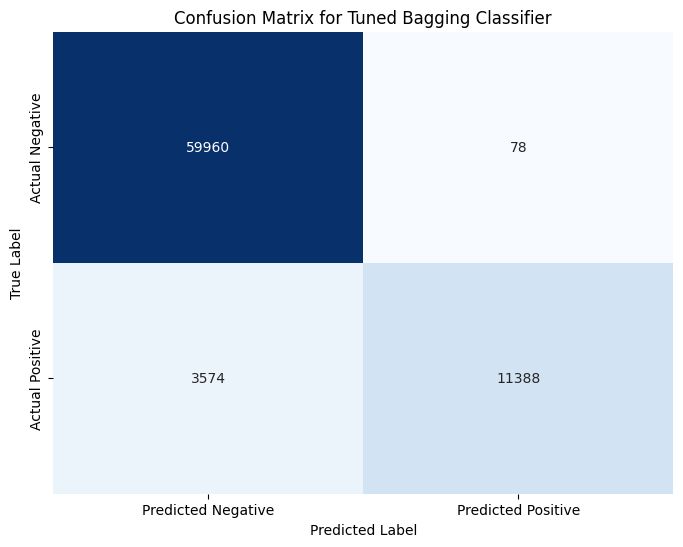

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Define the hyperparameter space for the Decision Tree
dt_param_dist = {
    'criterion': ['gini', 'entropy'],           # Measure of split quality
    'max_depth': [None, 10, 20, 30, 50],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],        # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5, 10],          # Minimum samples required in leaf nodes
    'max_features': [None, 'sqrt', 'log2'],     # Maximum features to consider for split
}

# Step 2: Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Step 3: Initialize the Bagging Classifier
bagging = BaggingClassifier( n_estimators=100, random_state=42)

# Step 4: Initialize RandomizedSearchCV for BaggingClassifier
bagging_param_dist = {
    'n_estimators': [50, 100, 200],  # Number of base estimators
    'max_samples': [0.5, 0.8, 1.0],  # Proportion of samples to draw for each base estimator
    'max_features': [0.5, 0.8, 1.0]   # Proportion of features to draw for each base estimator
}

# Step 5: Create the RandomizedSearchCV for BaggingClassifier
random_search = RandomizedSearchCV(
    estimator=bagging,
    param_distributions=bagging_param_dist,
    n_iter=10,              # Number of random combinations to try
    scoring='accuracy',     # Scoring metric (you can also try 'f1' or 'precision')
    cv=3,                   # 3-fold cross-validation
    random_state=42,
    n_jobs=-1               # Use all processors
)

# Step 6: Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 7: Retrieve the best estimator and make predictions
best_bagging = random_search.best_estimator_
y_pred_best = best_bagging.predict(X_test)

# Step 8: Calculate accuracy, precision, and recall for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='binary')
recall_best = recall_score(y_test, y_pred_best, average='binary')
f1_score_best = 2 * (precision_best * recall_best) / (precision_best + recall_best)

# Generate classification report for the best model
class_report_best = classification_report(y_test, y_pred_best)

# Print the best parameters and performance metrics
print("Best Parameters Found: ", random_search.best_params_)
print(f"Bagging Classifier - Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"F1 Score: {f1_score_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print("Classification Report:\n", class_report_best)

# Step 9: Generate the confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Step 10: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Bagging Classifier')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Stochastic Gradient Descent - Accuracy: 0.8005
Precision: 0.0000
F1 Score: 0.0000
Recall: 0.0000
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60038
           1       0.00      0.00      0.00     14962

    accuracy                           0.80     75000
   macro avg       0.40      0.50      0.44     75000
weighted avg       0.64      0.80      0.71     75000



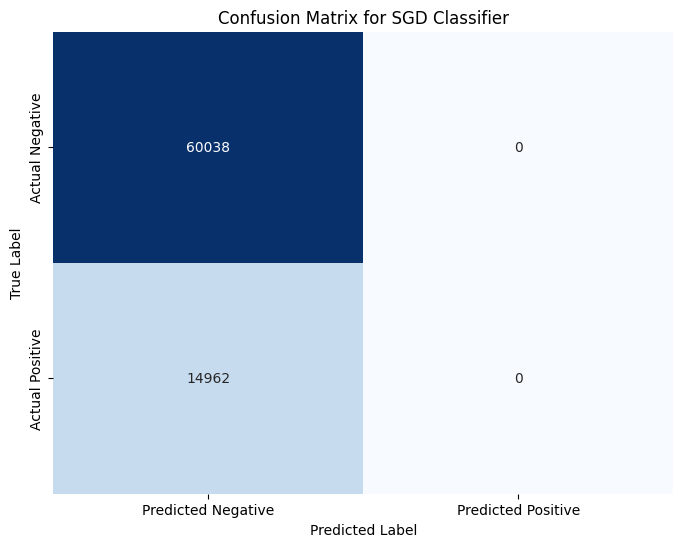

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Stochastic Gradient Descent Classifier
sgd = SGDClassifier(random_state=42)

# Fit the SGD model to the training data
sgd.fit(X_train, y_train)

# Make predictions on the test data
y_pred = sgd.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
sgd_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print the results
print(f"Stochastic Gradient Descent - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SGD Classifier')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.8006
Precision: 0.6667
F1 Score: 0.0016
Recall: 0.0008
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60038
           1       0.67      0.00      0.00     14962

    accuracy                           0.80     75000
   macro avg       0.73      0.50      0.45     75000
weighted avg       0.77      0.80      0.71     75000



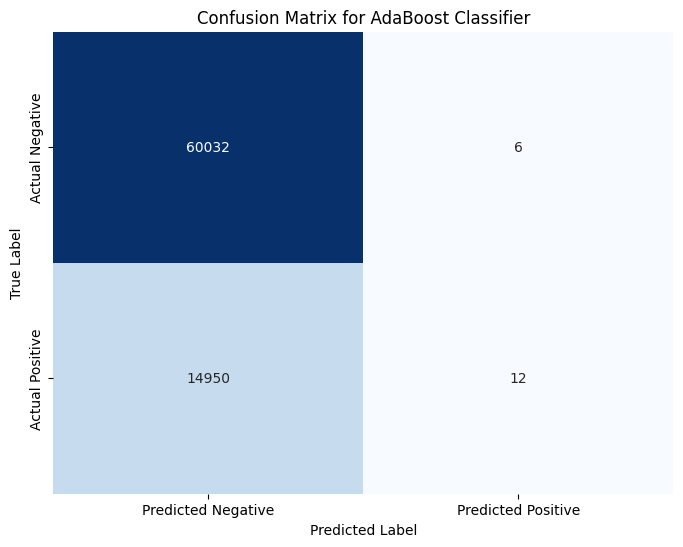

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize AdaBoost Classifier
ada = AdaBoostClassifier(random_state=42)

# Fit the AdaBoost model to the training data
ada.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
ada_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Print the results
print(f"AdaBoost - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

Extra Trees - Accuracy: 0.8607
Precision: 0.8575
F1 Score: 0.5090
Recall: 0.3619
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     60038
           1       0.86      0.36      0.51     14962

    accuracy                           0.86     75000
   macro avg       0.86      0.67      0.71     75000
weighted avg       0.86      0.86      0.84     75000



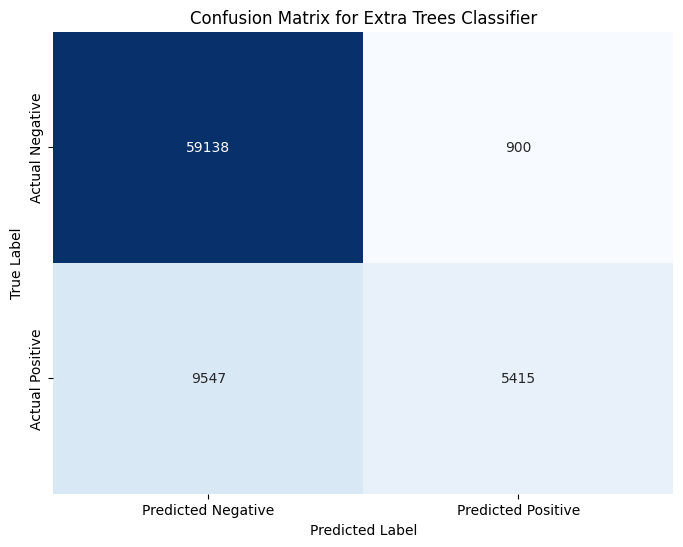

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

# Initialize Extra Trees Classifier
et = ExtraTreesClassifier(random_state=42)

# Fit the Extra Trees model to the training data
et.fit(X_train, y_train)

# Make predictions on the test data
y_pred = et.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
et_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Extra Trees - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

LDA - Accuracy: 0.8005
Precision: 0.0000
F1 Score: 0.0000
Recall: 0.0000
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60038
           1       0.00      0.00      0.00     14962

    accuracy                           0.80     75000
   macro avg       0.40      0.50      0.44     75000
weighted avg       0.64      0.80      0.71     75000



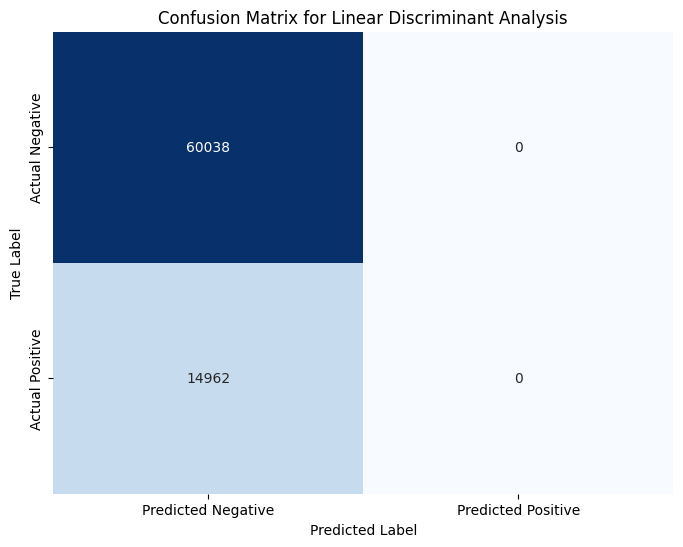

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
lda_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"LDA - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")

print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.show()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 34912, number of negative: 140088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199497 -> initscore=-1.389440
[LightGBM] [Info] Start training from score -1.389440
LightGBM - Accuracy: 0.8019
Precision: 0.9633
F1 Score: 0.0139
Recall: 0.0070
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60038
           1       0.96      0.01      0.01     14962

    accuracy                           0.80     75000
   macro avg       0.88      0.50      0.45     75000
weighted avg       0.83      0.80      0.72     75000



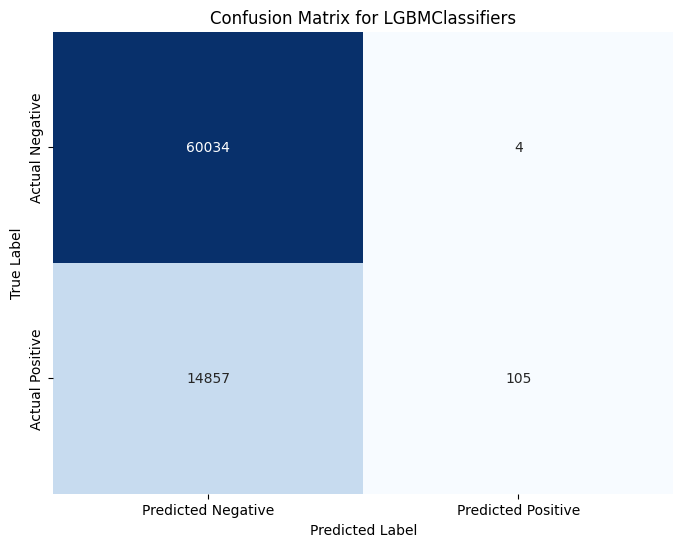

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize LightGBM Classifier
lightgbm = LGBMClassifier()

# Fit the LightGBM model to the training data
lightgbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lightgbm.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Store results in a dictionary
lightgbm_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'Classification Report': class_report
}

f1_score_lightgbm = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"LightGBM - Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score_lightgbm:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", class_report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LGBMClassifiers')
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score



# Initialize an array to store the results of each model's training and testing accuracy
arr = [
    log_reg_results,
    rf_results,
    dt_results,
    knn_results,
    nb_results,
    gb_results,
    xgb_results,
    bagging_results,  # bagging_results is defined now
    sgd_results,
    ada_results,
    lda_results,
    et_results,
    catboost_results,
    lightgbm_results,
]

# Define the model names
model_names = [
    "Logistic Regression",
    "Random Forest",
    "Decision Tree",
    "KNN",
    "Naive Bayes",
    "Gradient Boosting",
    "XGBoost",
    "Bagging",
    "SGD",
    "AdaBoost",
    "Extra Trees",
    "LDA",
    "CatBoost",
    "LightGBM",
]

# Print header
print(f"{'Model':<30}{'Accuracy':<15}{'Precision':<15}{'Recall':<15}{'F1 Score':<15}")

# Loop through each model's results and print only test accuracy
for idx, model_result in enumerate(arr):
    test_accuracy = model_result['Accuracy']
    precision = model_result.get('Precision', None)
    recall = model_result.get('Recall', None)
    f1_score = None
    if precision is not None and recall is not None:
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f"{model_names[idx]:<30}{test_accuracy:<15.4f}{precision:<15.4f}{recall:<15.4f}{f1_score:<15.4f}")


Model                         Accuracy       Precision      Recall         F1 Score       
Logistic Regression           0.8005         0.0000         0.0000         0.0000         
Random Forest                 0.8652         0.9685         0.3352         0.4980         
Decision Tree                 0.9322         0.8282         0.8330         0.8306         
KNN                           0.7710         0.2886         0.1009         0.1495         
Naive Bayes                   0.7995         0.2449         0.0024         0.0048         
Gradient Boosting             0.8009         1.0000         0.0018         0.0036         
XGBoost                       0.8087         0.9048         0.0457         0.0870         
Bagging                       0.8087         0.9048         0.0457         0.0870         
SGD                           0.8005         0.0000         0.0000         0.0000         
AdaBoost                      0.8006         0.6667         0.0008         0.0016         

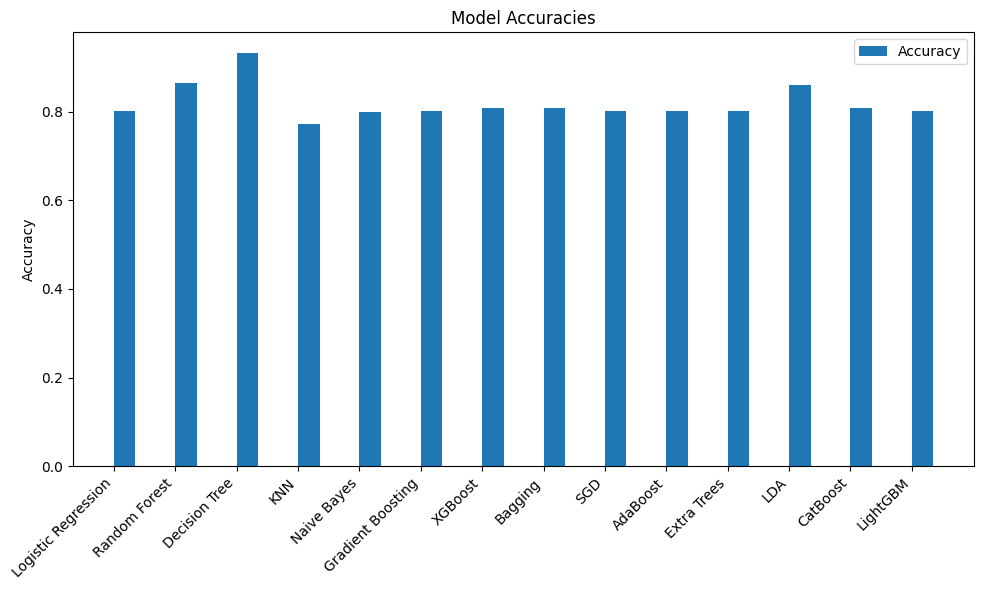

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = model_names
test_accuracies = [model['Accuracy'] for model in arr]    # Accessing test accuracies

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Accuracy')

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")  # Rotate and align right for better readability
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
